<a href="https://colab.research.google.com/github/RishankSoni/es335-assignment-1/blob/main/HAR_Task_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing

# !unzip /content/colab_folder.zip -d dataset

# !python /content/dataset/colab_folder/"UCI HAR Dataset"/CombineScript.py

# !python /content/dataset/colab_folder/"UCI HAR Dataset"/MakeDataset.py

# !pip install tsfel

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

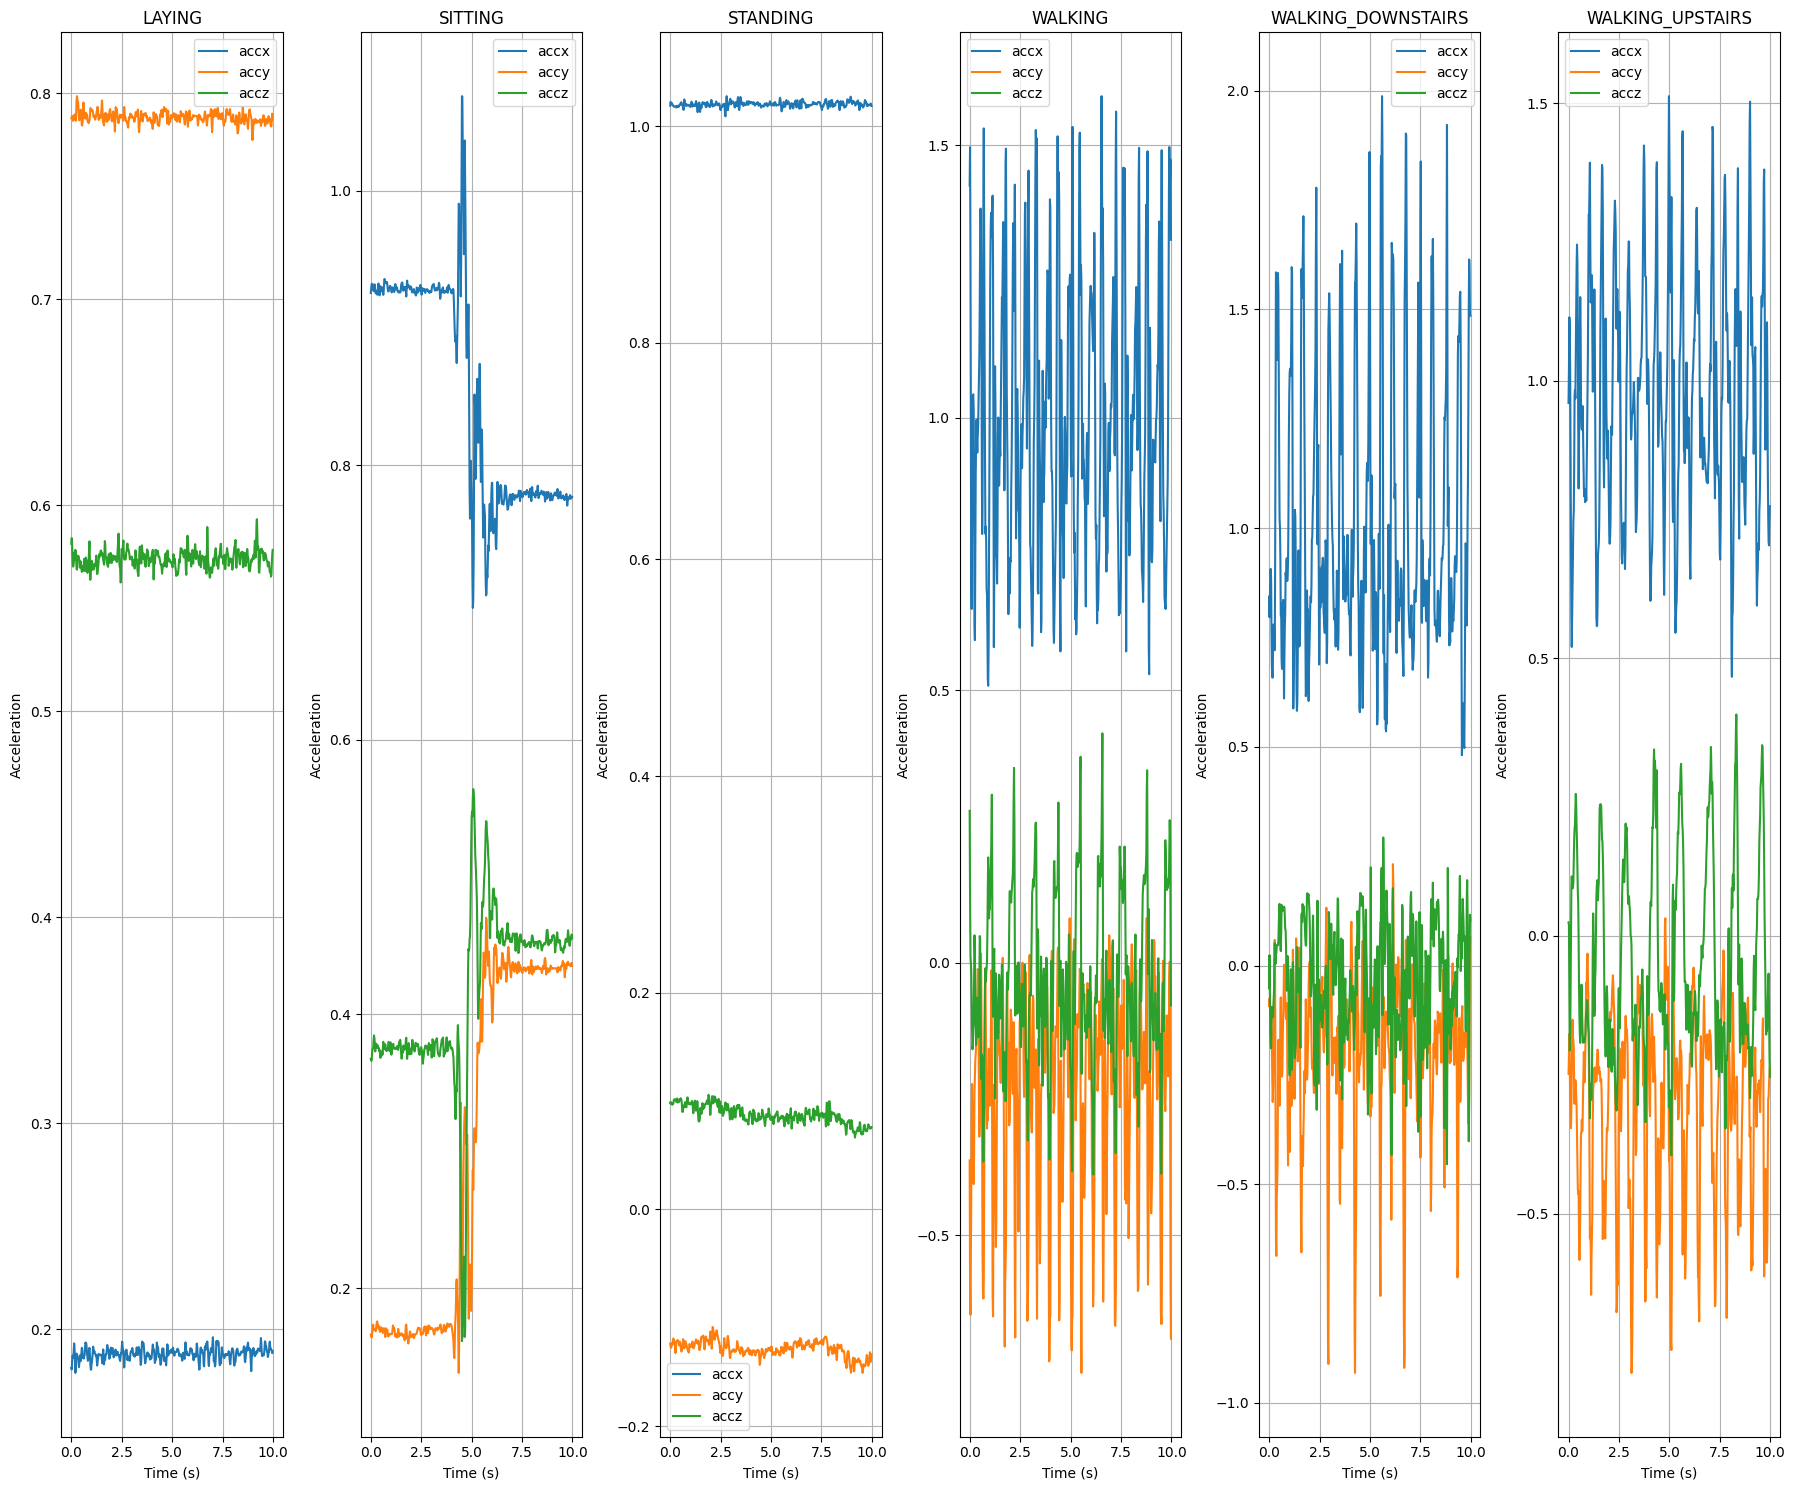

In [2]:
# HAR Task 1 EDA Question 1

activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

subjects = ["Subject_1", "Subject_11", "Subject_14", "Subject_15", "Subject_16", "Subject_17", "Subject_19", "Subject_21", "Subject_22", "Subject_23", "Subject_25", "Subject_26", "Subject_27", "Subject_28", "Subject_29", "Subject_3", "Subject_30", "Subject_5", "Subject_6", "Subject_7", "Subject_8"]

freq = 50

n = 500

plt.figure(figsize=(18, 15))

for i in range(len(activities)):

  df = pd.read_csv(f"Combined/Train/{activities[i]}/Subject_1.csv").iloc[:n]
  time = np.arange(len(df)) / freq

  plt.subplot(1, 6, i+1)
  plt.plot(time, df["accx"], label="accx")
  plt.plot(time, df["accy"], label="accy")
  plt.plot(time, df["accz"], label="accz")

  plt.title(activities[i])
  plt.xlabel("Time (s)")
  plt.ylabel("Acceleration")
  plt.legend()
  plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
# PCA function

# PCA

def PCA(m):

  cov_mat = np.cov(m, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)
  sort_i = np.argsort(eigenvalues)[::-1]
  eigen_vals = eigenvalues[sort_i]
  eigenvectors = eigenvectors[:, sort_i]
  eigenvectors2 = eigenvectors[:, 0:2]
  m2col = np.dot(m, eigenvectors2)

  return m2col

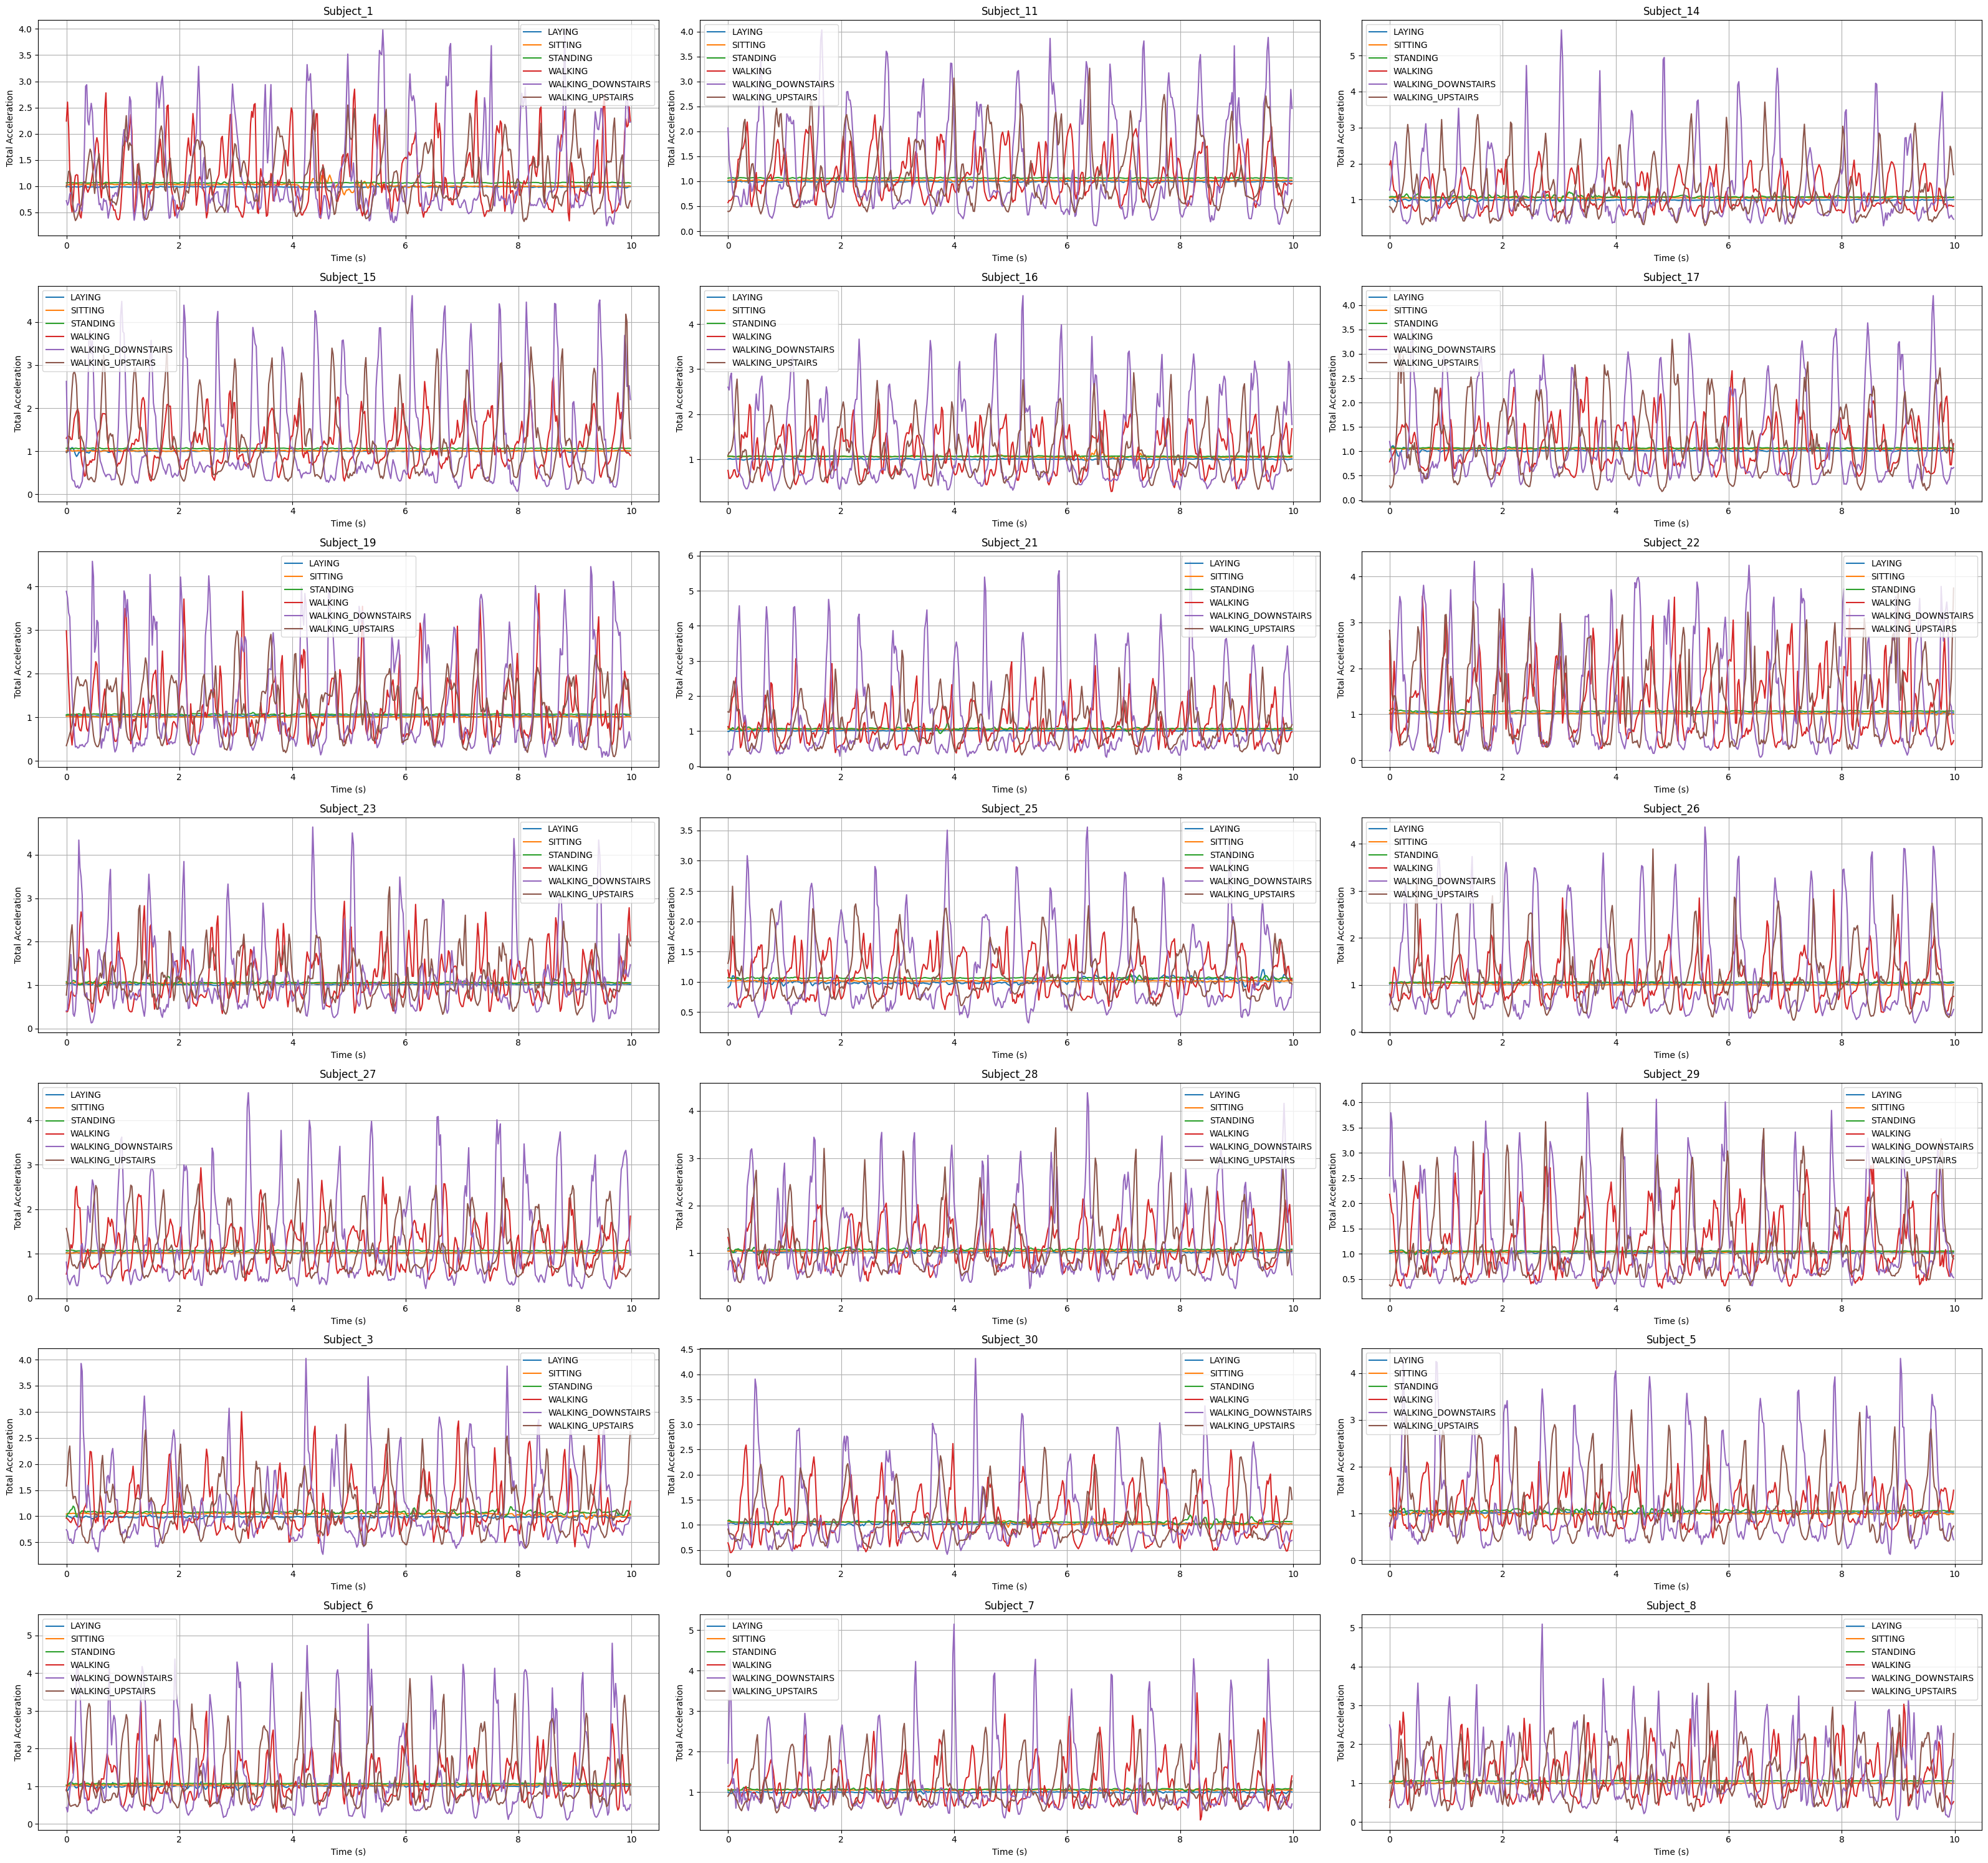

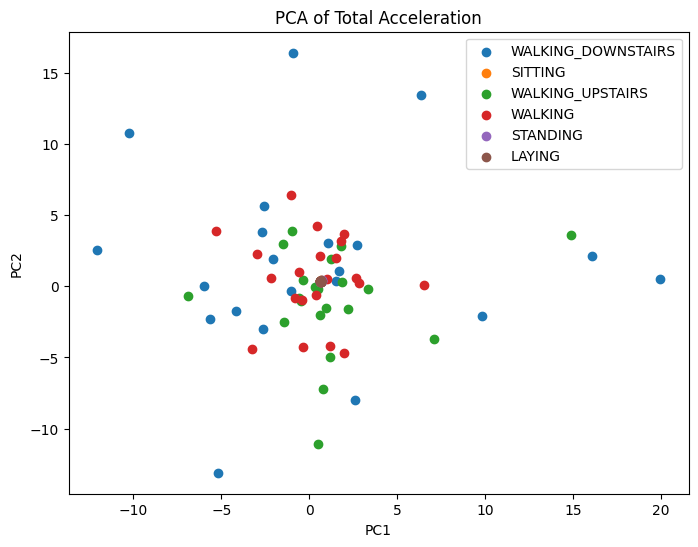

In [4]:
# HAR Task 1 EDA Question 2 and 3 (a)

m = np.zeros((126, 500))
labels = []   # activity label for each row in m
ri = 0

plt.figure(figsize=(32, 30))

for i in range(len(subjects)):

  for j in range(len(activities)):

    plt.subplot(7, 3, i+1)  # 3 rows, 3 cols of subplots
    df = pd.read_csv(f"Combined/Train/{activities[j]}/{subjects[i]}.csv").iloc[:n]
    time = np.arange(len(df)) / freq
    df2 = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

    m[ri, :] = df2.values
    labels.append(activities[j])   # assign activity label
    ri += 1

    plt.plot(time, df2, label=f"{activities[j]}")
    plt.title(subjects[i])
    plt.xlabel("Time (s)")
    plt.ylabel("Total Acceleration")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

PCAm = PCA(m)

# Plot PCA
for activity in set(activities):
    i = [k for k, act in enumerate(labels) if act == activity]
    plt.scatter(PCAm[i, 0], PCAm[i, 1], label = activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Total Acceleration")
plt.legend()
print("\n")
plt.show()

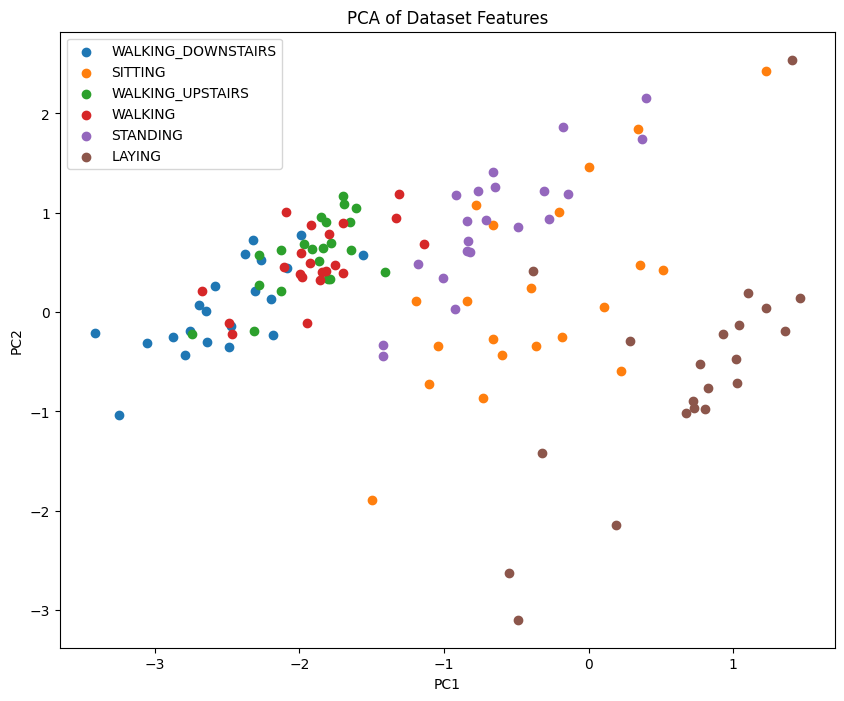


 [[ 1.         -0.77089582 -0.61898056  0.42201568  0.26542099  0.38692239
   0.82786847 -0.70017615 -0.44632944  0.72564389 -0.6734722  -0.58593032
   0.11872094 -0.17014061  0.0438678 ]
 [-0.77089582  1.          0.73692374 -0.55708919 -0.50867613 -0.57432331
  -0.78125115  0.84634943  0.49324887 -0.37385023  0.90084574  0.73433074
  -0.18078205  0.09061597  0.04380924]
 [-0.61898056  0.73692374  1.         -0.43496177 -0.32443308 -0.53058123
  -0.63306145  0.63606245  0.84903279 -0.31160619  0.66994077  0.91892908
  -0.07815503  0.1914443   0.10545392]
 [ 0.42201568 -0.55708919 -0.43496177  1.          0.79780145  0.80646165
   0.84412383 -0.12092855  0.00706028 -0.29162361 -0.82611898 -0.67060007
   0.39905028 -0.49332964 -0.17421441]
 [ 0.26542099 -0.50867613 -0.32443308  0.79780145  1.          0.83891202
   0.62350607 -0.0072827   0.09401999 -0.32896774 -0.76431598 -0.56128619
   0.32251459 -0.35073833 -0.14891746]
 [ 0.38692239 -0.57432331 -0.53058123  0.80646165  0.83891202  

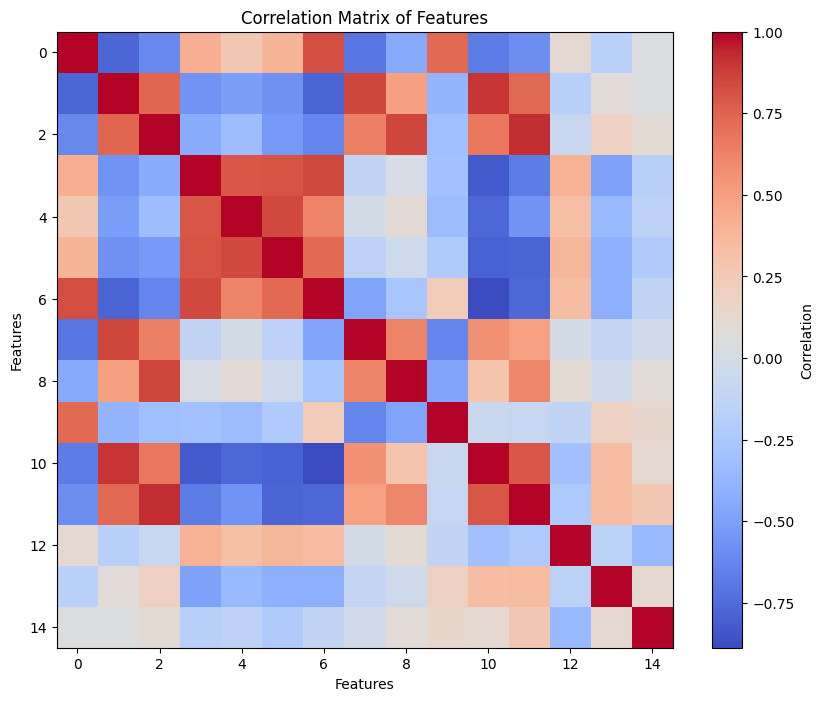

In [5]:
# HAR Task 1 EDA Question 3 (c) and 4

feat_matrix = np.zeros((126, 15))
labels_act = []
ri = 0
# col = pd.read_csv("/content/features.txt", delim_whitespace=True)

for i in range(len(subjects)):

  for j in range(len(activities)):

      row = []

      data = pd.read_csv(f"Combined/Train/{activities[j]}/{subjects[i]}.csv").iloc[:n]

      row.append(data["accx"].mean())
      row.append(data["accy"].mean())
      row.append(data["accz"].mean())
      row.append(data["accx"].std())
      row.append(data["accy"].std())
      row.append(data["accz"].std())
      row.append(data["accx"].max())
      row.append(data["accy"].max())
      row.append(data["accz"].max())
      row.append(data["accx"].min())
      row.append(data["accy"].min())
      row.append(data["accz"].min())
      row.append(data["accx"].skew())
      row.append(data["accy"].skew())
      row.append(data["accz"].skew())

      feat_matrix[ri, :] = row

      ri += 1

      labels_act.append(activities[j])

PCAfm = PCA(feat_matrix)

plt.figure(figsize=(10, 8))

# Plot PCA
for activity in set(activities):
    i = [k for k, act in enumerate(labels_act) if act == activity]
    plt.scatter(PCAfm[i, 0], PCAfm[i, 1], label = activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Dataset Features")
plt.legend()
plt.show()

corr_matrix = np.corrcoef(feat_matrix, rowvar=False)
print("\n",corr_matrix, "\n")

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Add labels
plt.title("Correlation Matrix of Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\2622341473.py:14: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


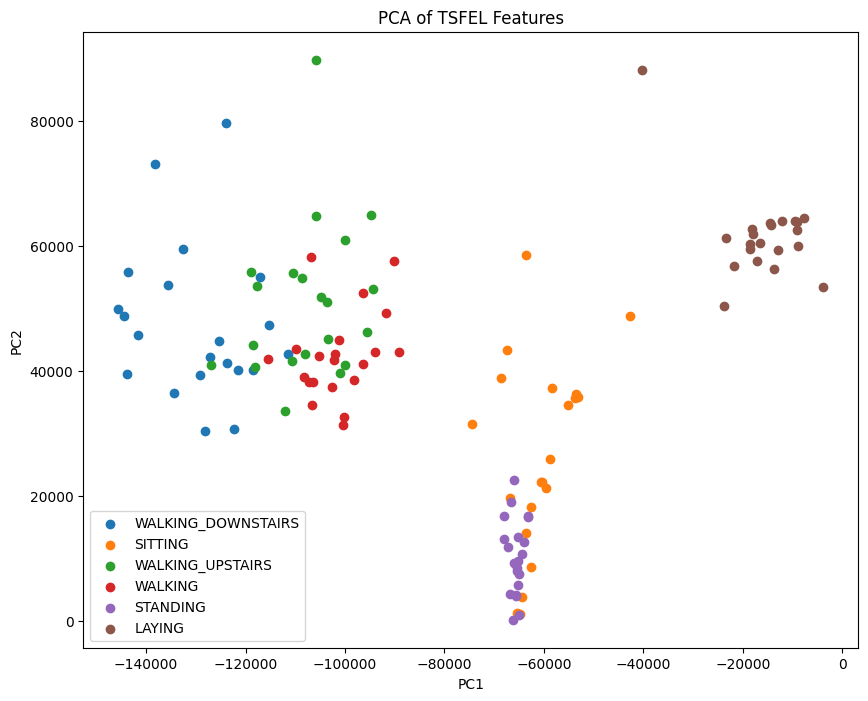

c:\Users\PRANEEL JOSHI\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\PRANEEL JOSHI\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



 [[ 1.          0.98079835 -0.28049208 ...  0.27943215  0.31739771
   0.48818655]
 [ 0.98079835  1.         -0.2280591  ...  0.23838701  0.26244085
   0.38392147]
 [-0.28049208 -0.2280591   1.         ... -0.19193542 -0.19940761
  -0.22019964]
 ...
 [ 0.27943215  0.23838701 -0.19193542 ...  1.          0.96520076
   0.28088548]
 [ 0.31739771  0.26244085 -0.19940761 ...  0.96520076  1.
   0.39471303]
 [ 0.48818655  0.38392147 -0.22019964 ...  0.28088548  0.39471303
   1.        ]] 



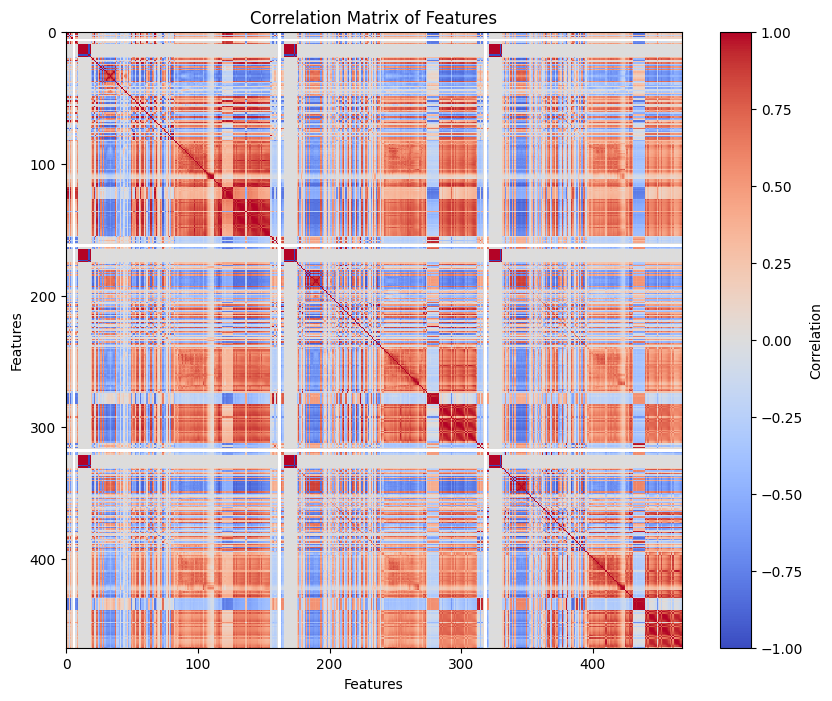

In [6]:
# HAR Task 1 EDA Question 3 (b) and 4

cfg = tsfel.get_features_by_domain()

feat_matrixt = np.zeros((126, 468))
labels_act2 = []
ri = 0

for i in range(len(subjects)):

  for j in range(len(activities)):

    dftsfel = pd.read_csv(f"Combined/Train/{activities[j]}/{subjects[i]}.csv").iloc[:n]
    featst = tsfel.time_series_features_extractor(cfg, dftsfel)
    rowt = featst.values.flatten()
    # n_feats = featst.values.flatten().shape[0]
    # print(n_feats)
    labels_act2.append(activities[j])

    feat_matrixt[ri, :] = rowt

    ri += 1

PCAdftsfel = PCA(feat_matrixt)

plt.figure(figsize=(10, 8))

# Plot PCA
for activity in set(activities):
    i = [k for k, act in enumerate(labels_act2) if act == activity]
    plt.scatter(PCAdftsfel[i, 0], PCAdftsfel[i, 1], label = activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of TSFEL Features")
plt.legend()
plt.show()

corr_matrixt = np.corrcoef(feat_matrixt, rowvar=False)
print("\n",corr_matrixt, "\n")

plt.figure(figsize=(10,8))
plt.imshow(corr_matrixt, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Add labels
plt.title("Correlation Matrix of Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

X_train shape: (126, 1500)
X_test shape: (54, 1500)
y_train shape: (126,)
y_test shape: (54,)
Accuracy: 0.6851851851851852
Precision: 0.6828703703703703
Recall: 0.6851851851851852

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         9
           SITTING       0.88      0.78      0.82         9
          STANDING       0.67      0.89      0.76         9
           WALKING       0.56      0.56      0.56         9
WALKING_DOWNSTAIRS       0.50      0.22      0.31         9
  WALKING_UPSTAIRS       0.50      0.67      0.57         9

          accuracy                           0.69        54
         macro avg       0.68      0.69      0.67        54
      weighted avg       0.68      0.69      0.67        54



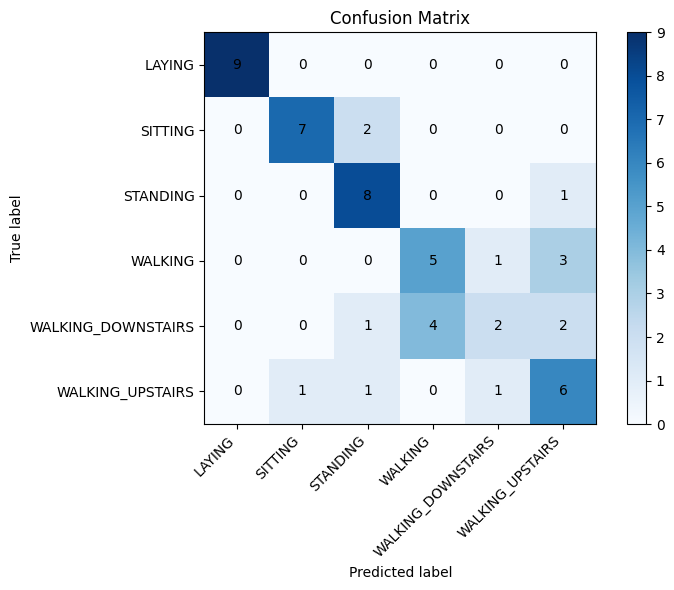

In [7]:
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS",
              "SITTING", "STANDING", "LAYING"]

subjects_train = ["Subject_1","Subject_3","Subject_5","Subject_6","Subject_7","Subject_8","Subject_11","Subject_14","Subject_15","Subject_16","Subject_17","Subject_19","Subject_21","Subject_22","Subject_23","Subject_25","Subject_26","Subject_27","Subject_28","Subject_29","Subject_30"]
subjects_test = ["Subject_10", "Subject_12", "Subject_13", "Subject_18",
                 "Subject_2", "Subject_20", "Subject_24", "Subject_4", "Subject_9"]

TIME_STEPS = 500
AXES = 3
FEATURE_LEN = TIME_STEPS * AXES

def read_and_flatten(file_path, time_steps=TIME_STEPS, axes=AXES):
    df = pd.read_csv(file_path)[["accx","accy","accz"]]
    arr = df.values.flatten()
    
    # Pad or truncate to fixed length
    if len(arr) < time_steps * axes:
        arr = np.pad(arr, (0, time_steps*axes - len(arr)), 'constant')
    elif len(arr) > time_steps * axes:
        arr = arr[:time_steps*axes]
        
    return arr

# ------------------------------
# Load Training Data
# ------------------------------
X_train = []
y_train = []

for subj in subjects_train:
    for act in activities:
        file_path = f"Combined/Train/{act}/{subj}.csv"
        if os.path.exists(file_path):
            X_train.append(read_and_flatten(file_path))
            y_train.append(act)
        else:
            print("Missing file:", file_path)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []

for subj in subjects_test:
    for act in activities:
        file_path = f"Combined/Test/{act}/{subj}.csv"
        if os.path.exists(file_path):
            X_test.append(read_and_flatten(file_path))
            y_test.append(act)
        else:
            print("Missing file:", file_path)

X_test = np.array(X_test)
y_test = np.array(y_test)


print(f"X_train shape: {X_train.shape}")  # (num_train_samples, 1500)
print(f"X_test shape: {X_test.shape}")    # (num_test_samples, 1500)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

clf_raw_data = DecisionTreeClassifier(random_state=42)
clf_raw_data.fit(X_train, y_train)


y_pred = clf_raw_data.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf_raw_data.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap="Blues")

# Title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
fig.colorbar(im, ax=ax)

# Tick marks with class names
ax.set_xticks(np.arange(len(clf_raw_data.classes_)))
ax.set_yticks(np.arange(len(clf_raw_data.classes_)))
ax.set_xticklabels(clf_raw_data.classes_, rotation=45, ha="right")
ax.set_yticklabels(clf_raw_data.classes_)

# Annotate each cell with its value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


In [8]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)

In [9]:
# HAR Task 2 Decision Trees Question 1 (a): Raw Accelerometer Data

train_features = []
train_paths = []
train_activities = []
test_paths=[]
test_activities = []

for i in range(len(subjects)):
  for j in range(len(activities)):
    train_paths.append(f"Combined/Train/{activities[j]}/{subjects[i]}.csv")
    train_activities.append(activities[j])

train_dfs = []
for file, activity in zip(train_paths, train_activities):
    df = pd.read_csv(file)
    df["activity"] = activity
    train_dfs.append(df)

train_df_raw = pd.concat(train_dfs, ignore_index=True)

test_paths = []
test_activities = []

subjects_test = ["Subject_10", "Subject_12", "Subject_13", "Subject_18", "Subject_2", "Subject_20", "Subject_24", "Subject_4", "Subject_9"]

test_paths = []
test_activities = []



for i in range(len(subjects_test)):
    for j in range(len(activities)):
        test_paths.append(f"Combined/Test/{activities[j]}/{subjects_test[i]}.csv")
        test_activities.append(activities[j])

test_dfs = []
for file, activity in zip(test_paths, test_activities):
    df = pd.read_csv(file)
    df["activity"] = activity
    test_dfs.append(df)

test_df_raw = pd.concat(test_dfs, ignore_index=True)

X_train_raw = train_df_raw[["accx", "accy", "accz"]]
y_train_raw = train_df_raw["activity"]

X_test_raw = test_df_raw[["accx", "accy", "accz"]]
y_test_raw = test_df_raw["activity"]

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_raw, y_train_raw)

y_pred_raw = clf.predict(X_test_raw)



Accuracy: 0.7222222222222222
Precision: 0.7101190476190476
Recall: 0.7222222222222222
Accuracy: 0.7222222222222222
Precision: 0.7101190476190476
Recall: 0.7222222222222222


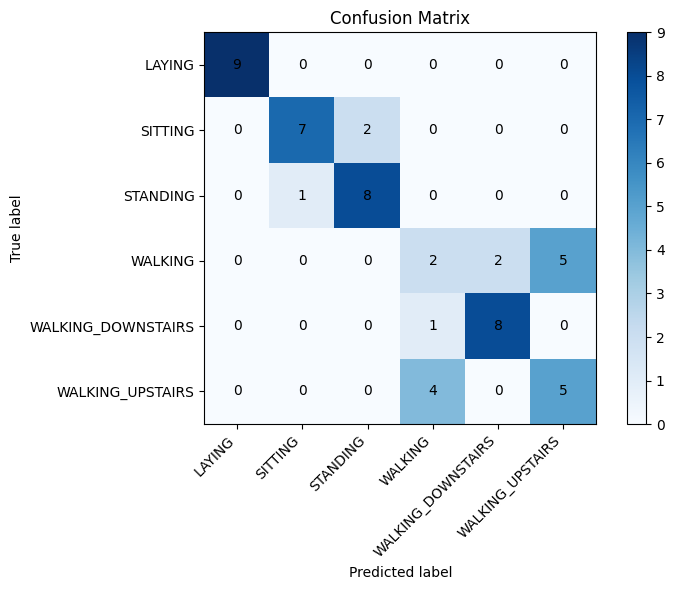

In [10]:
# HAR Task 2 Decision Trees Question 1 (b): Given Features



for i in range(len(subjects)):
  for j in range(len(activities)):
    train_paths.append(f"Combined/Train/{activities[j]}/{subjects[i]}.csv")
    train_activities.append(activities[j])

for file, activity in zip(train_paths, train_activities):

    df = pd.read_csv(file)

    features = {
        "mean_accx": df["accx"].mean(),
        "std_accx": df["accx"].std(),
        "min_accx": df["accx"].min(),
        "max_accx": df["accx"].max(),
        "skew_accx": df["accx"].skew(),

        "mean_accy": df["accy"].mean(),
        "std_accy": df["accy"].std(),
        "min_accy": df["accy"].min(),
        "max_accy": df["accy"].max(),
        "skew_accy": df["accy"].skew(),

        "mean_accz": df["accz"].mean(),
        "std_accz": df["accz"].std(),
        "min_accz": df["accz"].min(),
        "max_accz": df["accz"].max(),
        "skew_accz": df["accz"].skew(),

        "activity": activity
    }

    train_features.append(features)

train_df_feat = pd.DataFrame(train_features)

test_features = []

for file, activity in zip(test_paths, test_activities):

    df = pd.read_csv(file)

    features = {
        "mean_accx": df["accx"].mean(),
        "std_accx": df["accx"].std(),
        "min_accx": df["accx"].min(),
        "max_accx": df["accx"].max(),
        "skew_accx": df["accx"].skew(),

        "mean_accy": df["accy"].mean(),
        "std_accy": df["accy"].std(),
        "min_accy": df["accy"].min(),
        "max_accy": df["accy"].max(),
        "skew_accy": df["accy"].skew(),

        "mean_accz": df["accz"].mean(),
        "std_accz": df["accz"].std(),
        "min_accz": df["accz"].min(),
        "max_accz": df["accz"].max(),
        "skew_accz": df["accz"].skew(),

        "activity": activity
    }

    test_features.append(features)

test_df_feat = pd.DataFrame(test_features)

X_train_feat = train_df_feat.drop(columns=["activity"])
y_train_feat = train_df_feat["activity"]

X_test_feat = test_df_feat.drop(columns=["activity"])
y_test_feat = test_df_feat["activity"]

clf_by_author = DecisionTreeClassifier(random_state=42)
clf_by_author.fit(X_train_feat, y_train_feat)

y_pred_feat = clf_by_author.predict(X_test_feat)

print("Accuracy:", accuracy_score(y_test_feat, y_pred_feat))
print("Precision:", precision_score(y_test_feat, y_pred_feat, average="weighted"))
print("Recall:", recall_score(y_test_feat, y_pred_feat, average="weighted"))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

clf_by_author = DecisionTreeClassifier(random_state=42)
clf_by_author.fit(X_train_feat, y_train_feat)

y_pred_feat = clf_by_author.predict(X_test_feat)

print("Accuracy:", accuracy_score(y_test_feat, y_pred_feat))
print("Precision:", precision_score(y_test_feat, y_pred_feat, average="weighted"))
print("Recall:", recall_score(y_test_feat, y_pred_feat, average="weighted"))

# --- Confusion Matrix ---
cm_feat = confusion_matrix(y_test_feat, y_pred_feat, labels=clf_by_author.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_feat, cmap="Blues")

# Title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
fig.colorbar(im, ax=ax)

# Tick marks with class names
ax.set_xticks(np.arange(len(clf_by_author.classes_)))
ax.set_yticks(np.arange(len(clf_by_author.classes_)))
ax.set_xticklabels(clf_by_author.classes_, rotation=45, ha="right")
ax.set_yticklabels(clf_by_author.classes_)

# Annotate each cell with its value
for i in range(cm_feat.shape[0]):
    for j in range(cm_feat.shape[1]):
        ax.text(j, i, cm_feat[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# print("\nConfusion Matrix:\n", cm_feat)

In [11]:
# HAR Task 2 Decision Trees Question 1 (c): TSFEL Features

train_features_tsfel = []

for file, activity in zip(train_paths, train_activities):

    df = pd.read_csv(file)

    feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])
    feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])
    feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])

    feats = pd.concat([feats_x, feats_y, feats_z], axis=1)
    feats["activity"] = activity

    train_features_tsfel.append(feats)

train_df_tsfel = pd.concat(train_features_tsfel, ignore_index=True)

test_features_tsfel = []

for file, activity in zip(test_paths, test_activities):

    df = pd.read_csv(file)

    feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])
    feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])
    feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])

    feats = pd.concat([feats_x, feats_y, feats_z], axis=1)
    feats["activity"] = activity

    test_features_tsfel.append(feats)

test_df_tsfel = pd.concat(test_features_tsfel, ignore_index=True)

X_train_tsfel = train_df_tsfel.drop(columns=["activity"])
y_train_tsfel = train_df_tsfel["activity"]

X_test_tsfel = test_df_tsfel.drop(columns=["activity"])
y_test_tsfel = test_df_tsfel["activity"]

clf_tsfel = DecisionTreeClassifier(random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train_tsfel)

y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)

print("Accuracy:", accuracy_score(y_test_tsfel, y_pred_tsfel))
print("Precision:", precision_score(y_test_tsfel, y_pred_tsfel, average="weighted"))
print("Recall:", recall_score(y_test_tsfel, y_pred_tsfel, average="weighted"))
cm_tsfel = confusion_matrix(y_test_tsfel, y_pred_tsfel, labels=clf_tsfel.classes_)
print("\nConfusion Matrix:\n", cm_tsfel)


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:11: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:26: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:27: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1056482282.py:28: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


Accuracy: 0.8518518518518519
Precision: 0.8544191919191919
Recall: 0.8518518518518519

Confusion Matrix:
 [[9 0 0 0 0 0]
 [0 7 2 0 0 0]
 [0 1 8 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 2 5 2]
 [0 0 0 0 1 8]]


In [12]:
# HAR Task 2 Decision Trees Question 2

def task2q2(max_depth, X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

Accuracy for maximum depth 2: 0.46126887512724807
Accuracy for maximum depth 3: 0.5331587207329488
Accuracy for maximum depth 4: 0.6029913895486936
Accuracy for maximum depth 5: 0.6269882507634883
Accuracy for maximum depth 6: 0.6322796487953851
Accuracy for maximum depth 7: 0.637390778758059
Accuracy for maximum depth 8: 0.6363568883610451




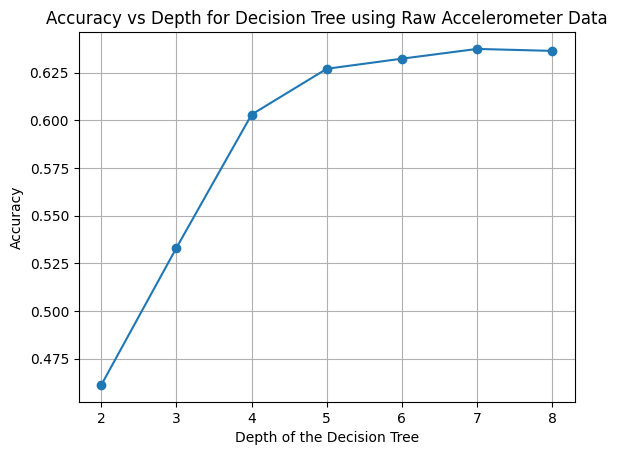

In [13]:
# HAR Task 2 Decision Trees Question 2: Raw Accelerometer Data

list_accuracy_raw = []

for i in range(2, 9):
  accuracy_varying_depth = task2q2(i, X_train_raw, y_train_raw, X_test_raw, y_test_raw)
  print(f"Accuracy for maximum depth {i}: {accuracy_varying_depth}")
  list_accuracy_raw.append(accuracy_varying_depth)

plt.plot(range(2, 9), list_accuracy_raw, marker='o')
plt.xlabel('Depth of the Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree using Raw Accelerometer Data')
plt.grid(True)
print("\n")
plt.show()

Accuracy for maximum depth 2: 0.5
Accuracy for maximum depth 3: 0.7407407407407407
Accuracy for maximum depth 4: 0.7777777777777778
Accuracy for maximum depth 5: 0.7407407407407407
Accuracy for maximum depth 6: 0.7407407407407407
Accuracy for maximum depth 7: 0.7407407407407407
Accuracy for maximum depth 8: 0.7222222222222222




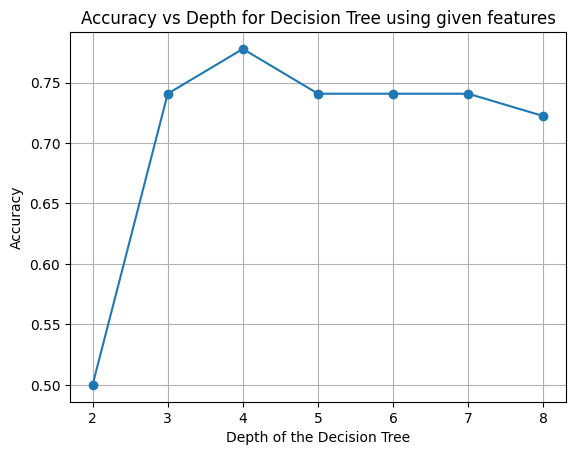

In [14]:
# HAR Task 2 Decision Trees Question 2: Given Features

list_accuracy_feat = []

for i in range(2, 9):
  accuracy_varying_depth = task2q2(i, X_train_feat, y_train_feat, X_test_feat, y_test_feat)
  print(f"Accuracy for maximum depth {i}: {accuracy_varying_depth}")
  list_accuracy_feat.append(accuracy_varying_depth)

plt.plot(range(2, 9), list_accuracy_feat, marker='o')
plt.xlabel('Depth of the Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree using given features')
plt.grid(True)
print("\n")
plt.show()

Accuracy for maximum depth 2: 0.5
Accuracy for maximum depth 3: 0.6851851851851852
Accuracy for maximum depth 4: 0.8518518518518519
Accuracy for maximum depth 5: 0.8518518518518519
Accuracy for maximum depth 6: 0.8518518518518519
Accuracy for maximum depth 7: 0.8518518518518519
Accuracy for maximum depth 8: 0.8518518518518519




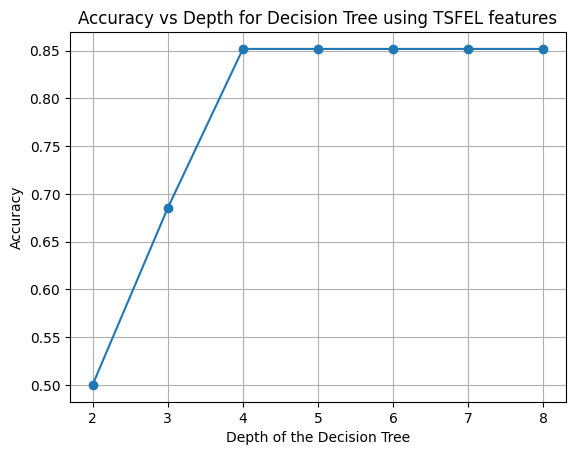

In [15]:
# HAR Task 2 Decision Trees Question 2: TSFEL Features

list_accuracy_tsfel = []

for i in range(2, 9):
  accuracy_varying_depth = task2q2(i, X_train_tsfel, y_train_tsfel, X_test_tsfel, y_test_tsfel)
  print(f"Accuracy for maximum depth {i}: {accuracy_varying_depth}")
  list_accuracy_tsfel.append(accuracy_varying_depth)

plt.plot(range(2, 9), list_accuracy_tsfel, marker='o')
plt.xlabel('Depth of the Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree using TSFEL features')
plt.grid(True)
print("\n")
plt.show()

Task3

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


Found 18 CSV files in 'dataset for har':
Sample file columns: ['time', 'ax (m/s^2)', 'ay (m/s^2)', 'az (m/s^2)', 'aT (m/s^2)']
Sample data shape: (2698, 5)
First few rows:
       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002222     -0.1769     -0.0160     -0.2054       0.272
1  0.002678     -0.1865     -0.0136     -0.2054       0.278
2  0.002829     -0.1865     -0.0160     -0.2126       0.283
3  0.002955     -0.1841     -0.0184     -0.2054       0.276
4  0.003215     -0.1961     -0.0136     -0.2078       0.286
Accuracy: 0.05555555555555555


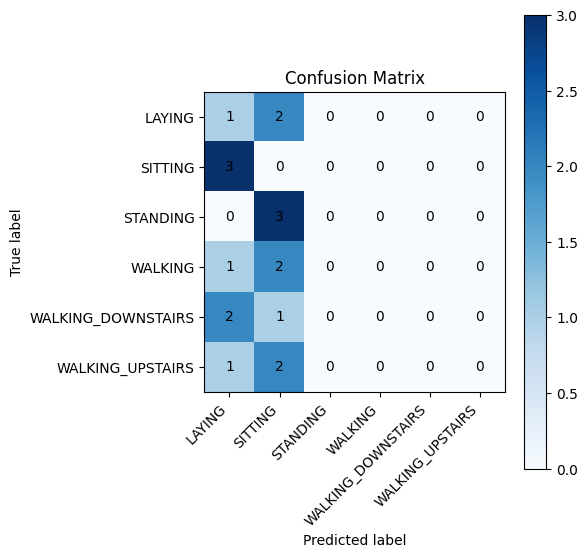

In [17]:
recorded_folder_path = os.path.join('dataset for har')
csv_files = [f for f in os.listdir(recorded_folder_path) if f.endswith('.csv')]
print(f"\nFound {len(csv_files)} CSV files in '{recorded_folder_path}':")

# First, check the column structure of the first file
if csv_files:
    sample_df = pd.read_csv(os.path.join(recorded_folder_path, csv_files[0]))
    print(f"Sample file columns: {sample_df.columns.tolist()}")
    print(f"Sample data shape: {sample_df.shape}")
    print(f"First few rows:\n{sample_df.head()}")

X_test_newdata = []

Y_acutal = [
    'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'LAYING',
    'STANDING', 'WALKING_UPSTAIRS', "WALKING", 'WALKING_DOWNSTAIRS', 'SITTING',
    'LAYING', "WALKING", 'WALKING_DOWNSTAIRS', 'SITTING', 'LAYING',
    'STANDING', 'WALKING_UPSTAIRS', "WALKING"
]

desired_len = 1500  # must match training

# ---- Step 1: Build test feature matrix ----
for file in csv_files:
    df = pd.read_csv(os.path.join(recorded_folder_path, file))
    
    # Take rows 300–800 and columns 1–4 (inclusive)
    data_subset = df.iloc[300:801, 1:5]  # shape: (~501, 4)
    
    # Flatten into a single vector
    feature_vec = data_subset.values.flatten()
    
    # Pad or truncate to desired length
    if len(feature_vec) < desired_len:
        feature_vec = np.pad(feature_vec, (0, desired_len - len(feature_vec)), 'constant')
    elif len(feature_vec) > desired_len:
        feature_vec = feature_vec[:desired_len]
    
    X_test_newdata.append(feature_vec)

# Convert to NumPy array
X_test_newdata = np.array(X_test_newdata)

# ---- Step 2: Predict all at once ----
predicted_activities = clf_raw_data.predict(X_test_newdata)

# ---- Step 3: Accuracy ----
print("Accuracy:", accuracy_score(Y_acutal, predicted_activities))

# ---- Step 4: Confusion Matrix ----
cm = confusion_matrix(Y_acutal, predicted_activities, labels=clf_raw_data.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, cmap="Blues")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
fig.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(clf_raw_data.classes_)))
ax.set_yticks(np.arange(len(clf_raw_data.classes_)))
ax.set_xticklabels(clf_raw_data.classes_, rotation=45, ha="right")
ax.set_yticklabels(clf_raw_data.classes_)

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002222     -0.1769     -0.0160     -0.2054       0.272
1  0.002678     -0.1865     -0.0136     -0.2054       0.278
2  0.002829     -0.1865     -0.0160     -0.2126       0.283
3  0.002955     -0.1841     -0.0184     -0.2054       0.276
4  0.003215     -0.1961     -0.0136     -0.2078       0.286


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


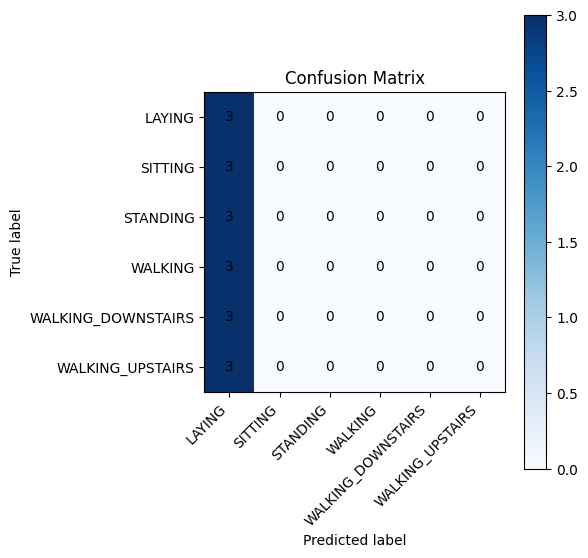

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002226      0.0963     -0.1426      0.1642       0.238
1  0.002712      0.0892     -0.1330      0.1379       0.211
2  0.002955      0.0628     -0.1282      0.1140       0.183
3  0.003188      0.0604     -0.1210      0.1020       0.169
4  0.022916     -0.0046     -0.0951     -0.0872       0.129


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


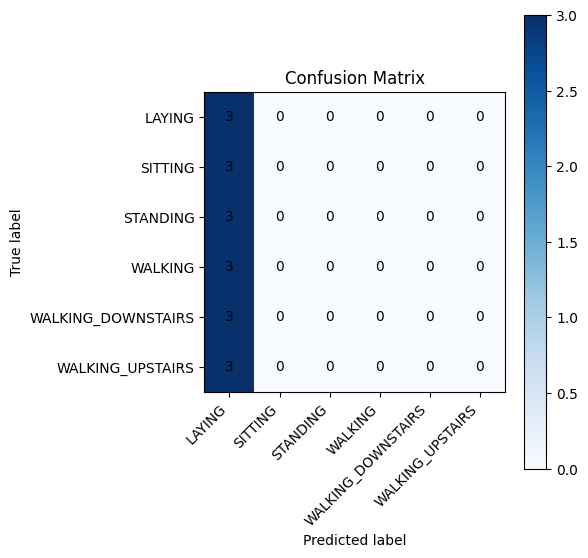

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.010980     -0.0075      0.0427     -0.0801       0.091
1  0.012318     -0.0099      0.0427     -0.0921       0.102
2  0.012545     -0.0027      0.0283     -0.1088       0.113
3  0.012928      0.0044      0.0355     -0.0873       0.094
4  0.013118      0.0116      0.0307     -0.0921       0.098


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


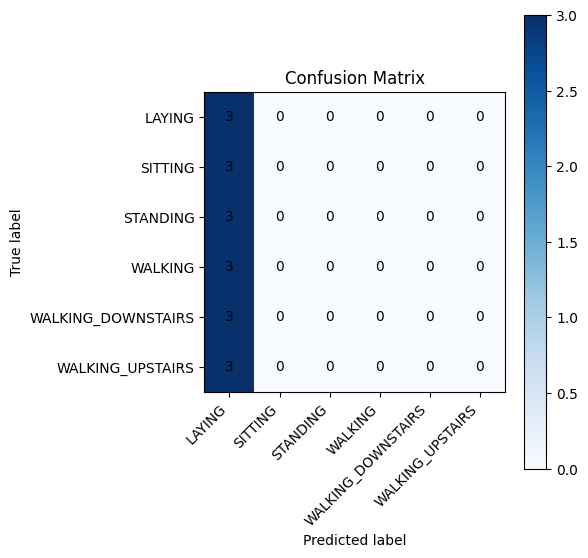

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002357     -0.1398     -0.1074      0.2295       0.289
1  0.002940     -0.1494     -0.1074      0.2367       0.300
2  0.003193     -0.1614     -0.1122      0.2343       0.306
3  0.003440     -0.1614     -0.1170      0.2247       0.300
4  0.003658     -0.1518     -0.1146      0.2199       0.291


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


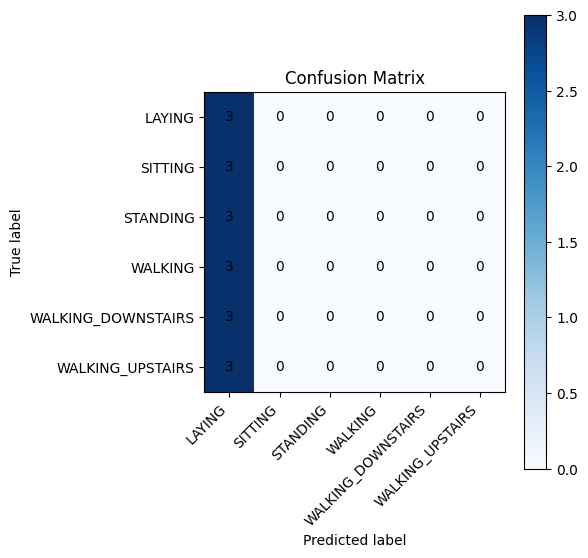

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002209     -0.0727     -0.0186      0.0243       0.079
1  0.002895     -0.0559     -0.0066      0.0386       0.068
2  0.003108     -0.0535      0.0030      0.0458       0.071
3  0.003247     -0.0583      0.0125      0.0578       0.083
4  0.003411     -0.0631      0.0125      0.0554       0.085


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


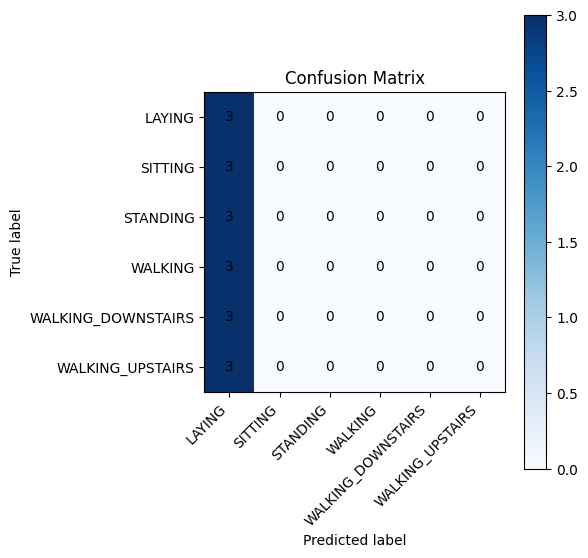

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.009359      0.0082     -0.1341     -0.1340       0.190
1  0.047010     -0.0122     -0.1245     -0.0420       0.132
2  0.047774     -0.0146     -0.1197     -0.0181       0.122
3  0.047894     -0.0194     -0.1125     -0.0253       0.117
4  0.047970     -0.0194     -0.1101     -0.0253       0.115


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


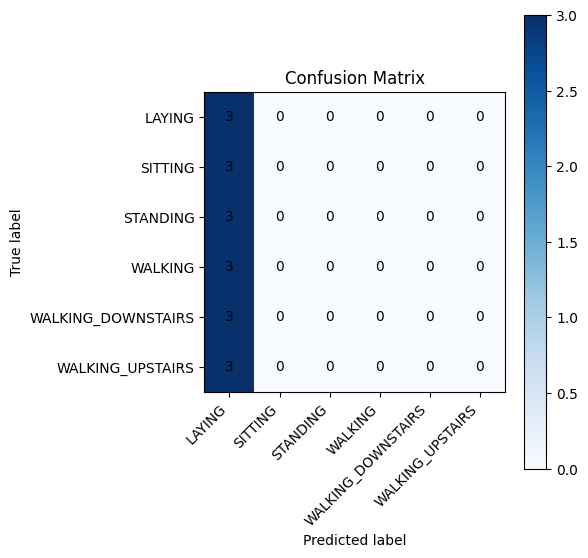

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002049     -0.0025     -0.0349     -0.0611       0.070
1  0.002596      0.0070     -0.0182     -0.0778       0.080
2  0.002799      0.0190     -0.0134     -0.0994       0.102
3  0.024001      0.0951      0.0337     -0.1897       0.215
4  0.025780      0.1094      0.0385     -0.1825       0.216


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


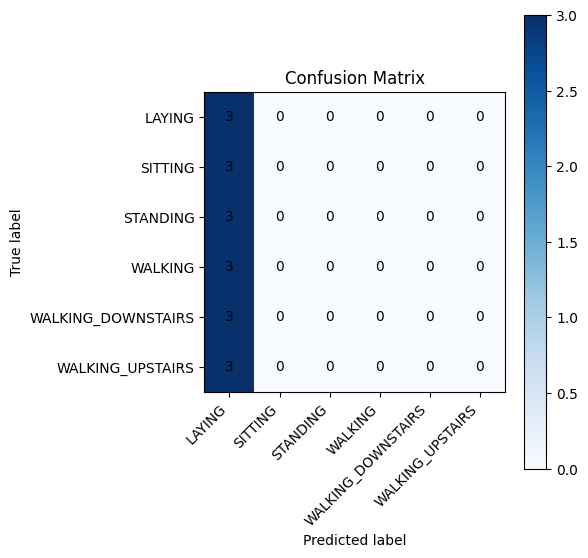

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002448     -0.0306     -0.0550     -0.0207       0.066
1  0.003000     -0.0162     -0.0407     -0.0159       0.047
2  0.003205     -0.0090     -0.0383     -0.0111       0.041
3  0.021525      0.0154     -0.0021      0.0191       0.025
4  0.022004      0.0083      0.0074      0.0024       0.011


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


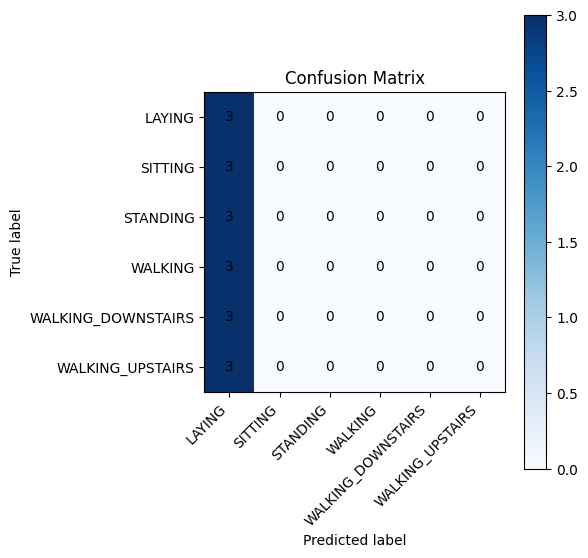

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.015413      0.0672      0.0865     -0.1034       0.151
1  0.016960      0.0624      0.0793     -0.0962       0.139
2  0.017243      0.0528      0.0817     -0.0962       0.137
3  0.018033      0.0456      0.0817     -0.0890       0.129
4  0.018663      0.0265      0.0913     -0.0938       0.134


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


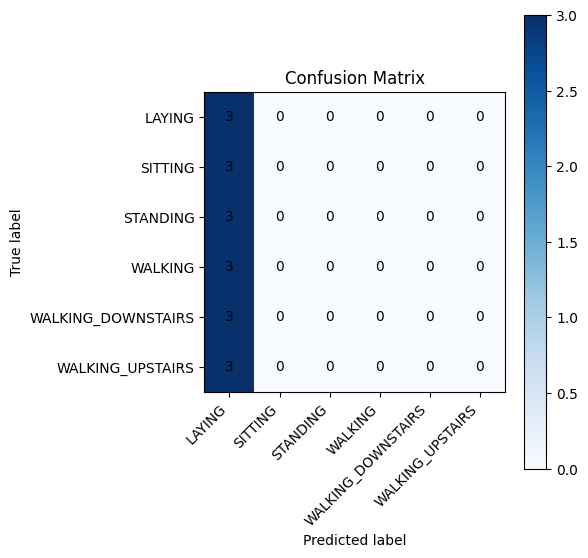

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002333      0.0883     -0.2946     -0.1366       0.336
1  0.030911      0.1909     -0.1343     -0.0742       0.245
2  0.031946      0.1933     -0.1511     -0.0574       0.252
3  0.071299      0.0014     -0.1498      0.0631       0.163
4  0.072009     -0.0058     -0.1666      0.0894       0.189


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


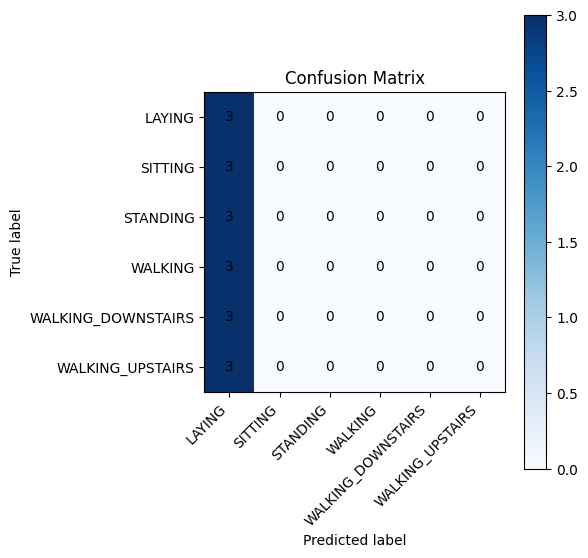

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.009242      0.2212     -0.1027     -0.0188       0.245
1  0.010310      0.2259     -0.1003     -0.0092       0.247
2  0.010444      0.2235     -0.0907      0.0004       0.241
3  0.010543      0.2331     -0.0979      0.0195       0.254
4  0.010654      0.2499     -0.1027      0.0219       0.271


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


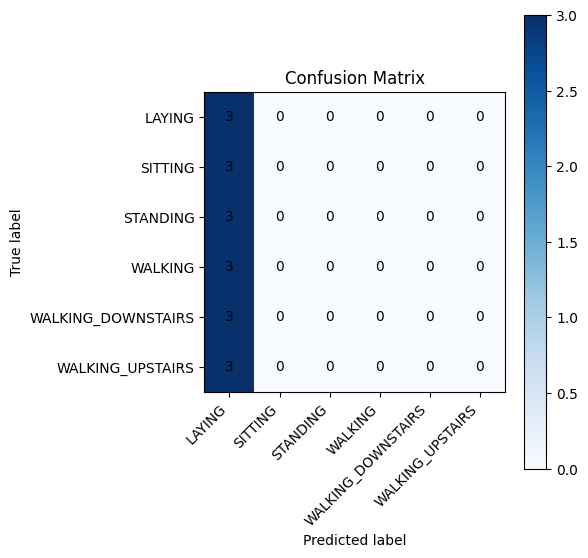

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.003337      0.1351     -0.1967     -0.2770       0.366
1  0.003894      0.1136     -0.1991     -0.2675       0.352
2  0.004066      0.1088     -0.1943     -0.2722       0.352
3  0.004211      0.0968     -0.1943     -0.2842       0.358
4  0.004370      0.0825     -0.2015     -0.2770       0.352


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


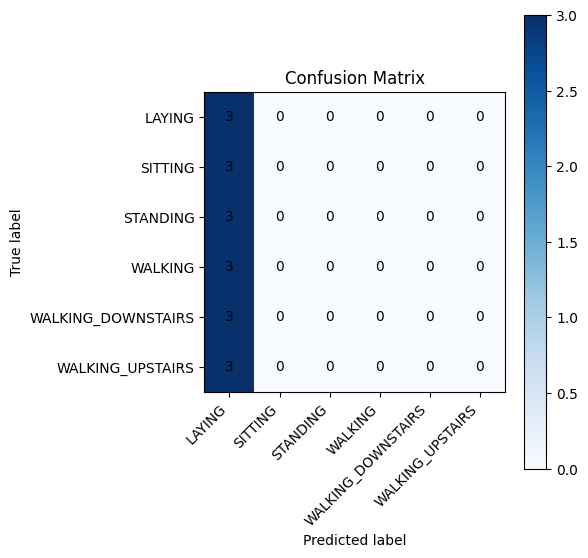

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.022518     -0.2197     -0.2058     -0.0955       0.316
1  0.063678     -0.1740     -0.1385     -0.0538       0.229
2  0.065159     -0.1668     -0.1290     -0.0371       0.214
3  0.098967     -0.2048     -0.1641      0.0855       0.276
4  0.139921     -0.5569     -0.1755      0.1998       0.617


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


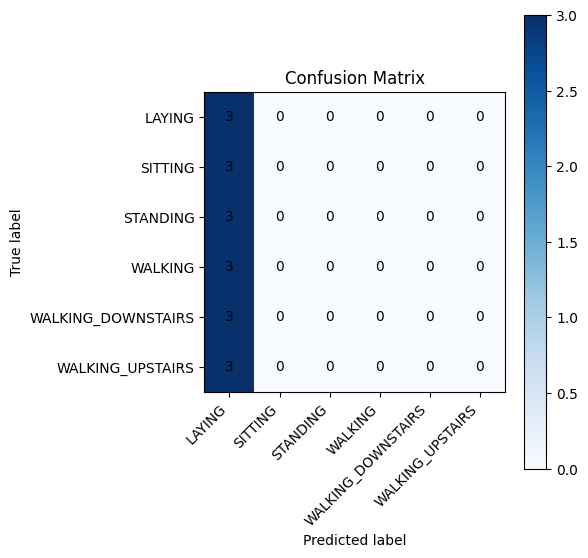

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002564      0.0316     -0.1195      0.0673       0.141
1  0.003142      0.0388     -0.1291      0.0554       0.146
2  0.003336      0.0292     -0.1147      0.0577       0.132
3  0.003502      0.0244     -0.1051      0.0530       0.120
4  0.003674      0.0268     -0.0955      0.0458       0.109


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


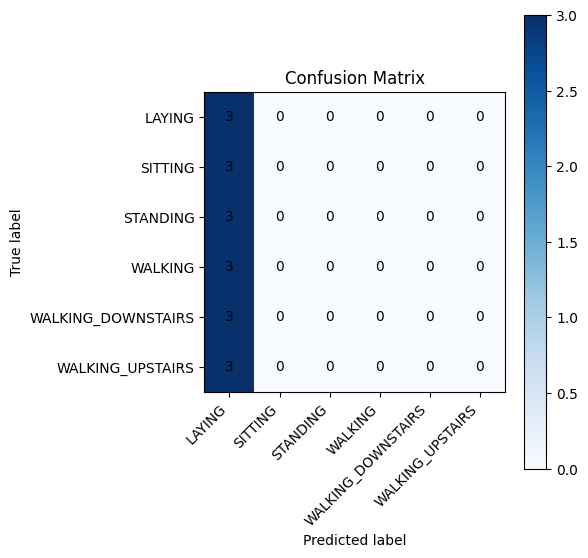

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002783      0.0158      0.0082     -0.0259       0.031
1  0.003743      0.0136     -0.0039     -0.0354       0.038
2  0.003954      0.0184     -0.0134     -0.0378       0.044
3  0.004071      0.0208     -0.0206     -0.0450       0.054
4  0.004200      0.0208     -0.0326     -0.0426       0.058


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


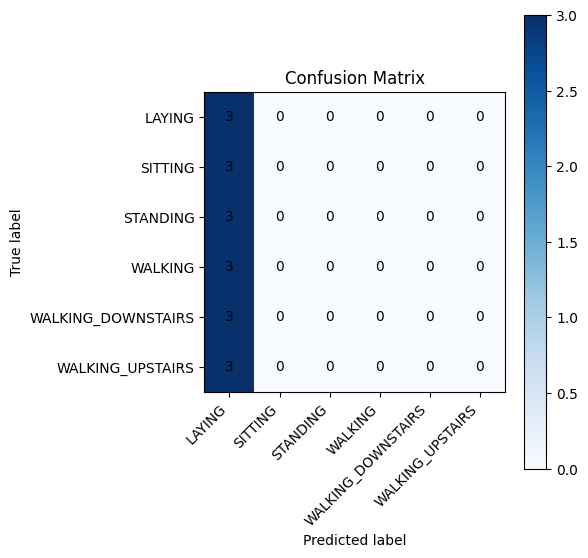

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.005896     -0.0253     -0.0175     -0.0834       0.089
1  0.006498     -0.0062     -0.0367     -0.0858       0.093
2  0.006669     -0.0086     -0.0462     -0.0930       0.104
3  0.006804      0.0010     -0.0391     -0.0977       0.105
4  0.006944     -0.0038     -0.0414     -0.1145       0.122


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


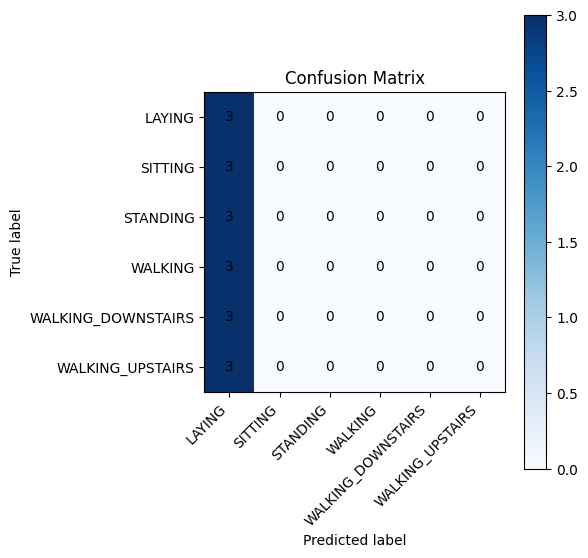

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.007326     -0.0532      0.0697     -0.1579       0.181
1  0.007961     -0.0651      0.0553     -0.1555       0.177
2  0.008098     -0.0723      0.0529     -0.1579       0.182
3  0.008201     -0.0627      0.0529     -0.1603       0.180
4  0.008302     -0.0579      0.0361     -0.1579       0.172


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


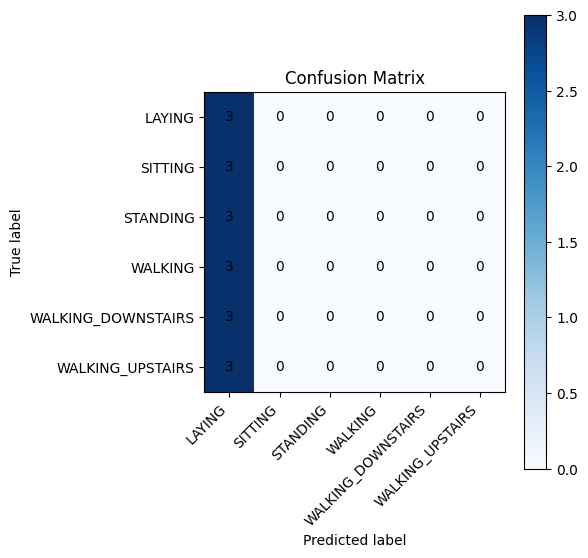

       time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.002929      0.1528     -0.1624      0.0406       0.227
1  0.003626      0.1504     -0.1696      0.0383       0.230
2  0.003922      0.1456     -0.1696      0.0335       0.226
3  0.013551      0.1964     -0.2191     -0.0209       0.295
4  0.014150      0.2155     -0.2646     -0.0209       0.342


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:9: UserWarning: Using default sampling frequency set in configuration file.
  feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])


C:\Users\PRANEEL JOSHI\AppData\Local\Temp\ipykernel_14564\1059556461.py:10: UserWarning: Using default sampling frequency set in configuration file.
  feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])


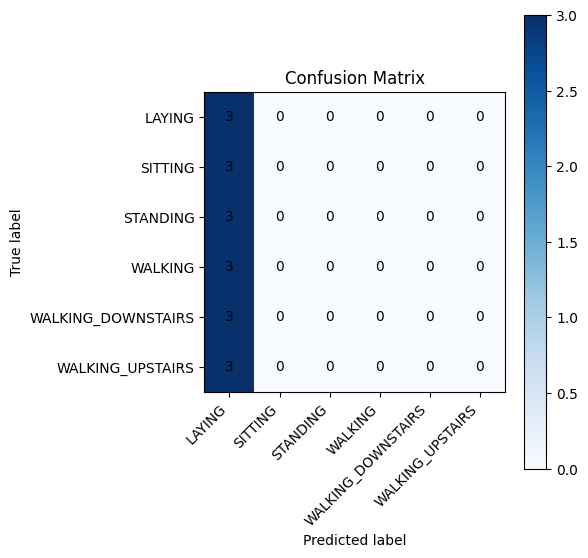

In [24]:
test_newdata_tsfel=[]
for file in csv_files:

    df = pd.read_csv(os.path.join(recorded_folder_path, file))
    print(df.head())
    df.columns = ["time", "accx", "accy", "accz","aT"]

    feats_x = tsfel.time_series_features_extractor(cfg, df["accx"])
    feats_y = tsfel.time_series_features_extractor(cfg, df["accy"])
    feats_z = tsfel.time_series_features_extractor(cfg, df["accz"])
    # Generate confusion matrix
    y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)
    cm = confusion_matrix(Y_acutal, y_pred_tsfel, labels=clf_tsfel.classes_)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm, cmap="Blues")
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    fig.colorbar(im, ax=ax)

    ax.set_xticks(np.arange(len(clf_tsfel.classes_)))
    ax.set_yticks(np.arange(len(clf_tsfel.classes_)))
    ax.set_xticklabels(clf_tsfel.classes_, rotation=45, ha="right")
    ax.set_yticklabels(clf_tsfel.classes_)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

    plt.tight_layout()
    plt.show()
    feats = pd.concat([feats_x, feats_y, feats_z], axis=1)
    feats["activity"] = activity

    test_newdata_tsfel.append(feats)

test_df_tsfel = pd.concat(test_newdata_tsfel, ignore_index=True)



X_test_tsfel = test_df_tsfel.drop(columns=["activity"])
y_test_tsfel = test_df_tsfel["activity"]


In [25]:
predicted_activities_tsfel = clf_tsfel.predict(X_test_tsfel)
print("Accuracy", accuracy_score(Y_acutal, predicted_activities_tsfel))

Accuracy 0.16666666666666666


Accuracy 0.16666666666666666


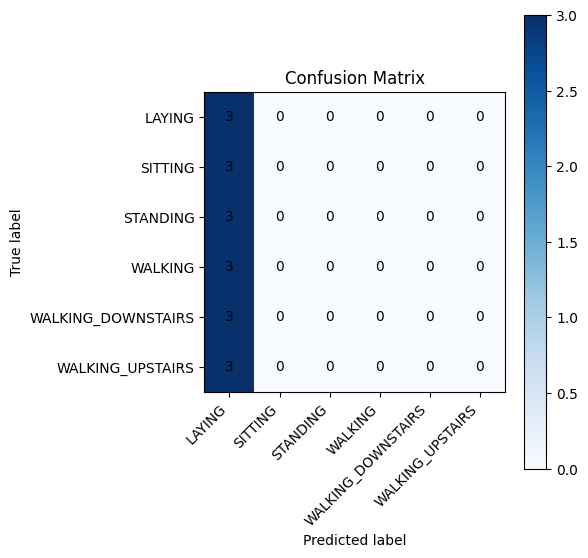

In [26]:


test_newdata_author = []
for file in csv_files:

    df = pd.read_csv(os.path.join(recorded_folder_path, file))
    df.columns = ["time", "accx", "accy", "accz","aT"]
    features = {
        "mean_accx": df["accx"].mean(),
        "std_accx": df["accx"].std(),
        "min_accx": df["accx"].min(),
        "max_accx": df["accx"].max(),
        "skew_accx": df["accx"].skew(),

        "mean_accy": df["accy"].mean(),
        "std_accy": df["accy"].std(),
        "min_accy": df["accy"].min(),
        "max_accy": df["accy"].max(),
        "skew_accy": df["accy"].skew(),

        "mean_accz": df["accz"].mean(),
        "std_accz": df["accz"].std(),
        "min_accz": df["accz"].min(),
        "max_accz": df["accz"].max(),
        "skew_accz": df["accz"].skew(),

        "activity": activity
    }

    test_newdata_author.append(features)

test_df_feat = pd.DataFrame(test_newdata_author)
X_test_feat = test_df_feat.drop(columns=["activity"])

y_pred_feat = clf_by_author.predict(X_test_feat)
print("Accuracy", accuracy_score(Y_acutal, y_pred_feat))

# --- Confusion Matrix ---
cm = confusion_matrix(Y_acutal, y_pred_feat, labels=clf_by_author.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, cmap="Blues")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
fig.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(clf_by_author.classes_)))
ax.set_yticks(np.arange(len(clf_by_author.classes_)))
ax.set_xticklabels(clf_by_author.classes_, rotation=45, ha="right")
ax.set_yticklabels(clf_by_author.classes_)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()
